In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Load the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

2025-11-20 14:38:55.331688: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763649535.772546      48 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763649535.898892      48 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [3]:
plt.rcParams['figure.figsize'] = (15, 2)

In [4]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train),(X_test, y_test)  = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [6]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
y_train = y_train.reshape(-1)

'frog'

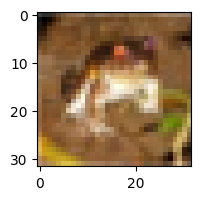

In [8]:
plt.imshow(X_train[0])
classes[y_train[0]]

deer


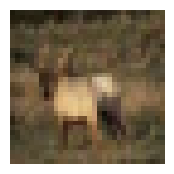

In [9]:
def plot_image(index):
    plt.imshow(X_train[index])
    print(classes[y_train[index]])
    plt.axis('off')

plot_image(3)
    

automobile


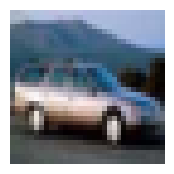

In [10]:
plot_image(4)

In [11]:
X_train[4]

# this is the value vector value of the above image

array([[[170, 180, 198],
        [168, 178, 196],
        [177, 185, 203],
        ...,
        [162, 179, 215],
        [158, 178, 214],
        [157, 177, 212]],

       [[168, 181, 198],
        [172, 185, 201],
        [171, 183, 200],
        ...,
        [159, 177, 212],
        [156, 176, 211],
        [154, 174, 209]],

       [[154, 170, 186],
        [149, 165, 181],
        [129, 144, 162],
        ...,
        [161, 178, 214],
        [157, 177, 212],
        [154, 174, 209]],

       ...,

       [[ 74,  84,  80],
        [ 76,  85,  81],
        [ 78,  85,  82],
        ...,
        [ 71,  75,  78],
        [ 68,  72,  75],
        [ 61,  65,  68]],

       [[ 68,  76,  77],
        [ 69,  77,  78],
        [ 72,  79,  78],
        ...,
        [ 76,  80,  83],
        [ 71,  75,  78],
        [ 71,  75,  78]],

       [[ 67,  75,  78],
        [ 68,  76,  79],
        [ 69,  75,  76],
        ...,
        [ 75,  79,  82],
        [ 71,  75,  78],
        [ 73,  77,  80]]

## Normalise

In [12]:
# Normalizing the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

X_train_scaled[4]
# Yeah now it is scaled

array([[[0.66666667, 0.70588235, 0.77647059],
        [0.65882353, 0.69803922, 0.76862745],
        [0.69411765, 0.7254902 , 0.79607843],
        ...,
        [0.63529412, 0.70196078, 0.84313725],
        [0.61960784, 0.69803922, 0.83921569],
        [0.61568627, 0.69411765, 0.83137255]],

       [[0.65882353, 0.70980392, 0.77647059],
        [0.6745098 , 0.7254902 , 0.78823529],
        [0.67058824, 0.71764706, 0.78431373],
        ...,
        [0.62352941, 0.69411765, 0.83137255],
        [0.61176471, 0.69019608, 0.82745098],
        [0.60392157, 0.68235294, 0.81960784]],

       [[0.60392157, 0.66666667, 0.72941176],
        [0.58431373, 0.64705882, 0.70980392],
        [0.50588235, 0.56470588, 0.63529412],
        ...,
        [0.63137255, 0.69803922, 0.83921569],
        [0.61568627, 0.69411765, 0.83137255],
        [0.60392157, 0.68235294, 0.81960784]],

       ...,

       [[0.29019608, 0.32941176, 0.31372549],
        [0.29803922, 0.33333333, 0.31764706],
        [0.30588235, 0

In [13]:
X_train_scaled.shape

(50000, 32, 32, 3)

## Build the model - ANN

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32, 32, 3)),
    keras.layers.Dense(500, activation = 'relu'),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    
    # Final layre
    keras.layers.Dense(10, activation = 'softmax')
])

model.compile(
    optimizer = "adam",
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

2025-11-20 14:39:29.476653: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [15]:
model.fit(X_train_scaled, y_train, epochs = 10, batch_size = 100)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.2643 - loss: 2.0315
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.3936 - loss: 1.6972
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.4248 - loss: 1.5958
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.4526 - loss: 1.5368
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.4686 - loss: 1.4799
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.4808 - loss: 1.4434
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.4951 - loss: 1.4112
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.5065 - loss: 1.3820
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.5164 - loss: 1.3528
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.5287 - loss: 1.3261


In [16]:
loss, acc = model.evaluate(X_test_scaled, y_test)
print(f'Accuracy:{acc * 100:.2f}')
print(f'LOss:{loss * 100:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5090 - loss: 1.3984
Accuracy:50.56999921798706
LOss:140.09432792663574


In [18]:
pred = model.predict(X_test_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [19]:
model.fit(X_train_scaled, y_train, epochs = 10, batch_size = 100)

(10000, 10)

## Building CNN model

In [32]:
model_1 = keras.Sequential([

    # Convolutional layer
    keras.layers.Conv2D(filters = 100, kernel_size = (3,3), input_shape = (32, 32, 3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters = 50, kernel_size = (3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    # Denes leayers    
    keras.layers.Flatten(),
    keras.layers.Dense(500, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation = 'softmax')
])

model_1.compile(
    optimizer = "adam",
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [33]:
model_1.fit(X_train_scaled, y_train, epochs = 10, batch_size = 100)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 77s 151ms/step - accuracy: 0.3609 - loss: 1.7353
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 75s 151ms/step - accuracy: 0.5981 - loss: 1.1287
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 75s 150ms/step - accuracy: 0.6726 - loss: 0.9245
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 75s 150ms/step - accuracy: 0.7300 - loss: 0.7726
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 74s 148ms/step - accuracy: 0.7719 - loss: 0.6535
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 74s 148ms/step - accuracy: 0.8095 - loss: 0.5418
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 75s 149ms/step - accuracy: 0.8488 - loss: 0.4370
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 74s 148ms/step - accuracy: 0.8771 - loss: 0.3480
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 74s 148ms/step - accuracy: 0.9042 - loss: 0.2754
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 74s 148ms/step - accuracy: 0.9259 - loss: 0.2176


In [34]:
loss, acc = model_1.evaluate(X_test_scaled, y_test)
print(f'Accuracy:{acc * 100:.2f}')
print(f'LOss:{loss * 100:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7067 - loss: 1.1937
Accuracy:71.06
LOss:119.62


## Adding a dropout layer

In [43]:
model_2 = keras.Sequential([

    # Convolutional layer
    keras.layers.Conv2D(filters = 100, kernel_size = (3,3), input_shape = (32, 32, 3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters = 50, kernel_size = (3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    # Denes leayers    
    keras.layers.Flatten(),
    keras.layers.Dense(500, activation = 'relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation = 'softmax')
])

model_2.compile(
    optimizer = "adam",
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model_2.fit(X_train_scaled, y_train, epochs = 10, batch_size = 100)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 78s 152ms/step - accuracy: 0.2933 - loss: 1.8848
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 76s 152ms/step - accuracy: 0.5274 - loss: 1.3182
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 75s 150ms/step - accuracy: 0.6176 - loss: 1.0958
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 75s 150ms/step - accuracy: 0.6647 - loss: 0.9666
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 75s 150ms/step - accuracy: 0.6944 - loss: 0.8843
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 74s 148ms/step - accuracy: 0.7218 - loss: 0.8025
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 82s 149ms/step - accuracy: 0.7404 - loss: 0.7472
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 74s 148ms/step - accuracy: 0.7611 - loss: 0.6868
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 75s 150ms/step - accuracy: 0.7837 - loss: 0.6322
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 74s 148ms/step - accuracy: 0.7882 - loss: 0.6055


In [35]:
def plot_image(x, y, index):
    plt.imshow(x[index])
    print(classes[y[index]])
    plt.axis('off')


dog


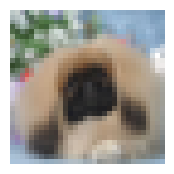

In [37]:
y_test = y_test.reshape(-1)

plot_image(X_test, y_test, 250)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
dog


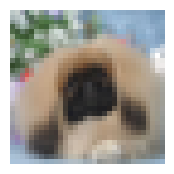

In [38]:
pred = model_1.predict(X_test_scaled)

classes[np.argmax(pred[250])]
plot_image(X_test, y_test, 250)

frog


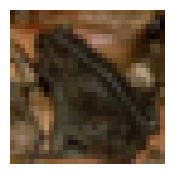

In [39]:
classes[np.argmax(pred[30])]
plot_image(X_test, y_test, 30)

In [40]:
y_pred = [np.argmax(value) for value in pred]

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1000
           1       0.81      0.83      0.82      1000
           2       0.64      0.56      0.60      1000
           3       0.52      0.49      0.51      1000
           4       0.67      0.65      0.66      1000
           5       0.54      0.68      0.60      1000
           6       0.79      0.78      0.78      1000
           7       0.76      0.78      0.77      1000
           8       0.87      0.76      0.81      1000
           9       0.76      0.84      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



<Axes: >

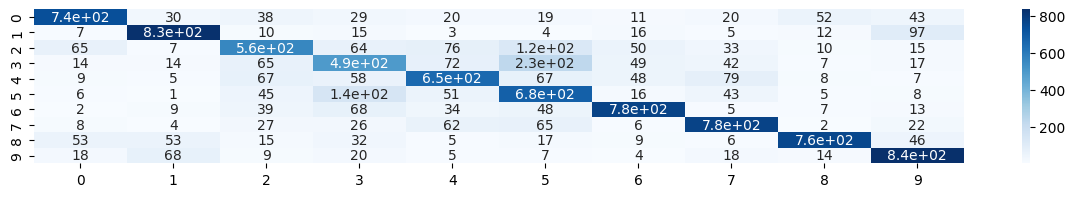

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

cf = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(cf)
sns.heatmap(cm, cmap='Blues', annot=True)